# 1. Daten Laden

# 2. Einladen, Säubern und Darstellen

In [1]:
# Module einladen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Einladen und Darstellen der Daten in Numpy
heading = np.loadtxt('monthly_in_situ_co2_mlo.csv', 
                     skiprows = 54, 
                     max_rows = 3, 
                     dtype = str, 
                     delimiter = ',' )
data = np.loadtxt('monthly_in_situ_co2_mlo.csv', 
                  skiprows = 57, 
                  delimiter = ',')

In [3]:
# Säubern der Daten
data_clean = data[np.all(data != -99.99, axis=1)]

In [4]:
# Darstellen in Pandas 
df = pd.DataFrame(data_clean)
df

,0,1,2,3,4,5,6,7,8,9
0,1958.0,3.0,21259.0,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
1,1958.0,4.0,21290.0,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
2,1958.0,5.0,21320.0,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
3,1958.0,7.0,21381.0,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
4,1958.0,8.0,21412.0,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
...,...,...,...,...,...,...,...,...,...,...
749,2021.0,1.0,44211.0,2021.0411,415.17,415.11,415.24,415.17,415.17,415.11
750,2021.0,2.0,44242.0,2021.1260,416.47,415.70,416.13,415.35,416.47,415.70
751,2021.0,3.0,44270.0,2021.2027,417.14,415.59,417.06,415.50,417.14,415.59
752,2021.0,4.0,44301.0,2021.2877,418.24,415.44,418.48,415.66,418.24,415.44


In [5]:
# Achsen definieren
y_all = data_clean[:,4] # Spalte 4 (CO2 Gehalt)
x_all = data_clean[:,3] # Spalte 3 (Datum)

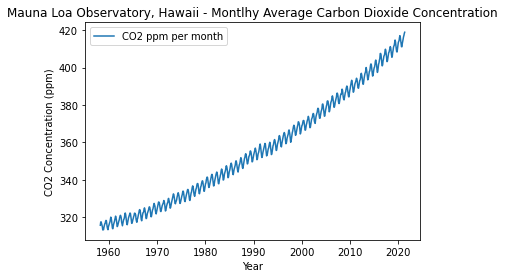

In [6]:
# Plotten
fix, ax = plt.subplots()
ax.plot(x_all,y_all, label = 'CO2 ppm per month')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1]);
ax.set_title('Mauna Loa Observatory, Hawaii - Montlhy Average Carbon Dioxide Concentration')
ax.legend()

# 3. Data Analysieren

## 3.1 Datenverlauf in einem kürzeren Zeitfenster

In [7]:
# Zeitraum der Daten zuschneiden
after_1970 = data_clean[data_clean[:, 0] >= 1970] # nach 1970
data_short = after_1970[after_1970[:, 0] <= 1980] # vor 1980

In [8]:
# Darstellen in Pandas 
df_short = pd.DataFrame(data_short)
df_short

,0,1,2,3,4,5,6,7,8,9
0,1970.0,1.0,25583.0,1970.0411,325.06,325.02,325.30,325.24,325.06,325.02
1,1970.0,2.0,25614.0,1970.1260,325.98,325.33,325.99,325.32,325.98,325.33
2,1970.0,3.0,25642.0,1970.2027,326.93,325.60,326.74,325.40,326.93,325.60
3,1970.0,4.0,25673.0,1970.2877,328.13,325.74,327.89,325.48,328.13,325.74
4,1970.0,5.0,25703.0,1970.3699,328.08,325.16,328.47,325.55,328.08,325.16
...,...,...,...,...,...,...,...,...,...,...
127,1980.0,8.0,29448.0,1980.6230,337.61,339.00,337.49,338.91,337.61,339.00
128,1980.0,9.0,29479.0,1980.7077,335.90,339.01,335.90,339.04,335.90,339.01
129,1980.0,10.0,29509.0,1980.7896,336.03,339.24,335.95,339.15,336.03,339.24
130,1980.0,11.0,29540.0,1980.8743,337.12,339.13,337.27,339.26,337.12,339.13


In [9]:
# Achsen definieren
y_short = data_short[:,4]
x_short = data_short[:,3]

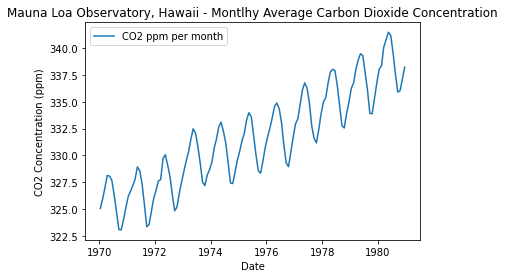

In [10]:
# Plotten des Zeitraums
fix, ax = plt.subplots()
ax.plot(x_short,y_short, label = 'CO2 ppm per month')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1]);
ax.set_title('Mauna Loa Observatory, Hawaii - Montlhy Average Carbon Dioxide Concentration')
ax.legend()

## 3.2 Datenanpassung

In [11]:
# Funktion Definieren
def func_linear (x, a, f, m, c):
    return (a * np.sin(x * f)) + (m * x + c)

In [12]:
# Data fit
popt_short, pcov_short  = curve_fit(func_linear, x_short, y_short, p0=[10, 3.7, 5, 5])

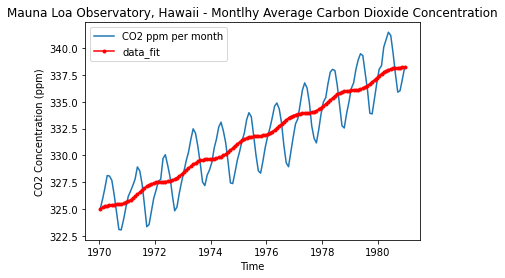

In [13]:
# Plotten der Daten & Fit des Zeitraums
fig, ax = plt.subplots()
ax.plot(x_short, y_short, label = 'CO2 ppm per month') 
ax.plot(x_short, func_linear(x_short, popt_short[0], popt_short[1], popt_short[2], popt_short[3]), '.-r', label = 'data_fit')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1])
ax.set_title('Mauna Loa Observatory, Hawaii - Montlhy Average Carbon Dioxide Concentration')
plt.legend()

## 3.3 Fitbereich erweitern

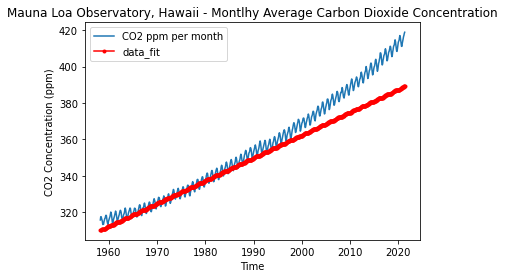

In [14]:
# Plotten
fig, ax = plt.subplots()
ax.plot(x_all, y_all, label = 'CO2 ppm per month') 
ax.plot(x_all, func_linear(x_all, popt_short[0], popt_short[1], popt_short[2], popt_short[3]), '.-r', label = 'data_fit') # x_all (Ganzer Zeitraum)
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1])
ax.set_title('Mauna Loa Observatory, Hawaii - Montlhy Average Carbon Dioxide Concentration')
plt.legend()

## 3.4 Zweite Datenanpassung

In [15]:
# Funktion definieren
def func_exp(x, b, xo, p, c):
    return b * ((x - xo)**p) + c

In [16]:
# Curve Fit
popt_all, pcov_all = curve_fit(func_exp, x_all, y_all, p0 = [5,0.1,1.5,5])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


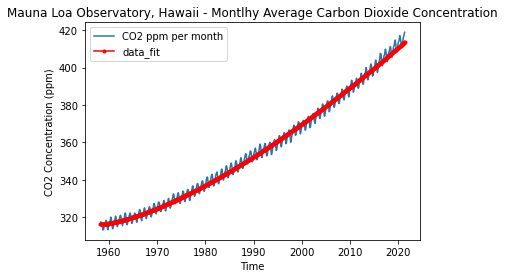

In [17]:
# Plot
fig, ax = plt.subplots()
ax.plot(x_all, y_all, label = 'CO2 ppm per month') 
ax.plot(x_all, func_exp(x_all, popt_all[0], popt_all[1], popt_all[2], popt_all[3]), '.-r', label = 'data_fit')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1])
ax.set_title('Mauna Loa Observatory, Hawaii - Montlhy Average Carbon Dioxide Concentration')
plt.legend()

## 3.5 Anpassung Kombinieren

In [18]:
# Funktion definieren
def func_exp_tri(x, b, xo, p, c, a, f):
    return (b * ((x - xo)**p) + c) + (a * np.sin(x * f))

In [19]:
# Curve Fit
popt_all, pcov_all = curve_fit(func_exp_tri, x_all, y_all, p0 = [5,0.1,1.5,5,10,3.7])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


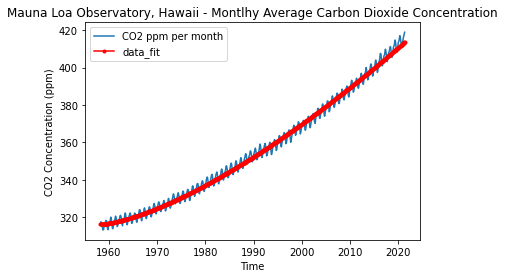

In [20]:
# Plot
fig, ax = plt.subplots()
ax.plot(x_all, y_all, label = 'CO2 ppm per month') 
ax.plot(x_all, func_exp_tri(x_all, popt_all[0], popt_all[1], popt_all[2], popt_all[3], popt_all[4], popt_all[5]), '.-r', label = 'data_fit')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1])
ax.set_title('Mauna Loa Observatory, Hawaii - Montlhy Average Carbon Dioxide Concentration')
plt.legend()

## 3.6 Ausgabe

In [21]:
# Ausgabe der Funktion
popt_all_rounded = np.round(popt_all, decimals = 2)
print('f(x) = ('+str(popt_all_rounded[0])+' * ((x - '+str(popt_all_rounded[1])+')**'+str(popt_all_rounded[2])+') + '+str(popt_all_rounded[3])+') + ('+str(popt_all_rounded[4])+' * np.sin(x * '+str(popt_all_rounded[5])+'))')

f(x) = (0.24 * ((x - 1958.2)**1.44) + 316.15) + (-0.06 * np.sin(x * 3.68))


# 4. Daten Extrapolieren

In [22]:
# Neuer Zeitraum
x_future_int = np.arange(2000,2101)

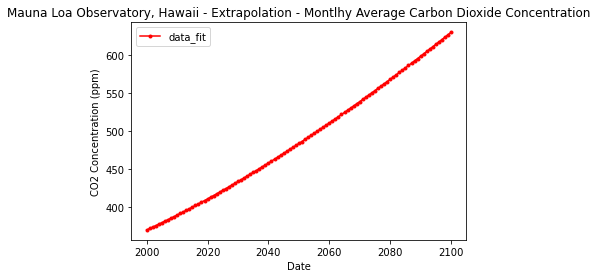

In [23]:
# Plot
fig, ax = plt.subplots()
ax.plot(x_future_int, func_exp_tri(x_future_int, popt_all[0], popt_all[1], popt_all[2], popt_all[3], popt_all[4], popt_all[5]), '.-r', label = 'data_fit')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Concentration (ppm)' % data[-1,1])
ax.set_title('Mauna Loa Observatory, Hawaii - Extrapolation - Montlhy Average Carbon Dioxide Concentration')
plt.legend()

# 5. Klimaszenarien

In [24]:
# Datenstruktur
ipcc_year  = [2000,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100]
ipcc_rcp26 = [368.9,378.8,389.3,412.1,430.8,440.2,442.7,441.7,437.5,431.6,426.0,420.9]
ipcc_rcp45 = [368.9,378.8,389.1,411.1,435.0,460.8,486.5,508.9,524.3,531.1,533.7,538.4]
ipcc_rcp60 = [368.9,378.8,389.1,409.4,428.9,450.7,477.7,510.6,549.8,594.3,635.6,669.7]
ipcc_rcp85 = [368.9,378.8,389.3,415.8,448.8,489.4,540.5,603.5,677.1,758.2,844.8,935.9]

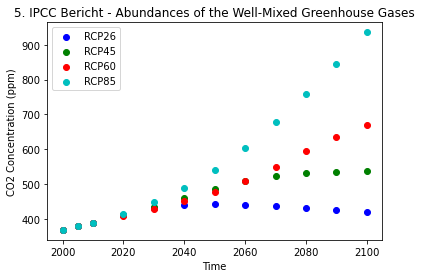

In [25]:
# Plot
fig, ax = plt.subplots()
ax.scatter(ipcc_year, ipcc_rcp26, c = 'b', label = 'RCP26')
ax.scatter(ipcc_year, ipcc_rcp45, c = 'g', label = 'RCP45')
ax.scatter(ipcc_year, ipcc_rcp60, c = 'r', label = 'RCP60')
ax.scatter(ipcc_year, ipcc_rcp85, c = 'c', label = 'RCP85')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_title('5. IPCC Bericht - Abundances of the Well-Mixed Greenhouse Gases')
plt.legend()

# 6. Business as usual vs. Klimamodelle

In [26]:
# Jahre und Monate für Rechnung in  Dezimalzahlen umwandeln
year_month_dec = []
sum = 2000
for i in range (1,1201):
    sum = sum + (1/12)
    year_month_dec.append(np.round(sum, decimals = 2)) 
    


In [27]:
# Interpolation
rcp26_interp = np.interp(year_month_dec,ipcc_year,ipcc_rcp26,)
rcp45_interp = np.interp(year_month_dec,ipcc_year,ipcc_rcp45,)
rcp60_interp = np.interp(year_month_dec,ipcc_year,ipcc_rcp60,)
rcp85_interp = np.interp(year_month_dec,ipcc_year,ipcc_rcp85,)

In [28]:
# Neue X-Achse mit Korrekter Beschriftung
year_month = []
for i in range(2000,2100):
    for j in range(1,13):
        date = str(i) + '_' + str(j)
        year_month.append(date)

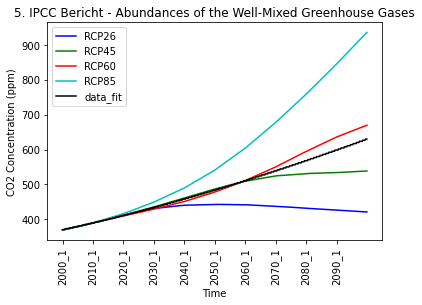

In [29]:
# Plot
fig, ax = plt.subplots()
ax.plot(year_month, rcp26_interp, c = 'b', label = 'RCP26')
ax.plot(year_month, rcp45_interp, c = 'g', label = 'RCP45')
ax.plot(year_month, rcp60_interp, c = 'r', label = 'RCP60')
ax.plot(year_month, rcp85_interp, c = 'c', label = 'RCP85')
ax.plot(year_month, func_exp_tri(np.round(year_month_dec, decimals = 0), popt_all[0], popt_all[1], popt_all[2], popt_all[3], popt_all[4], popt_all[5]), 'k', label = 'data_fit')
plt.xticks(np.arange(0, 1200, step=120))
plt.xticks(rotation = 'vertical')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_title('5. IPCC Bericht - Abundances of the Well-Mixed Greenhouse Gases')
plt.legend()

# Kann etwas länger laden

In [ ]:
# RCP26 und RCP85 zeigen starke Unterschiede in den kommenden Jahren. Die selbst erstellte Projektion entspricht am ehesten RCP45. Hoffentlich wird es eher RCP26 :I